# Decision Tree (Classification)
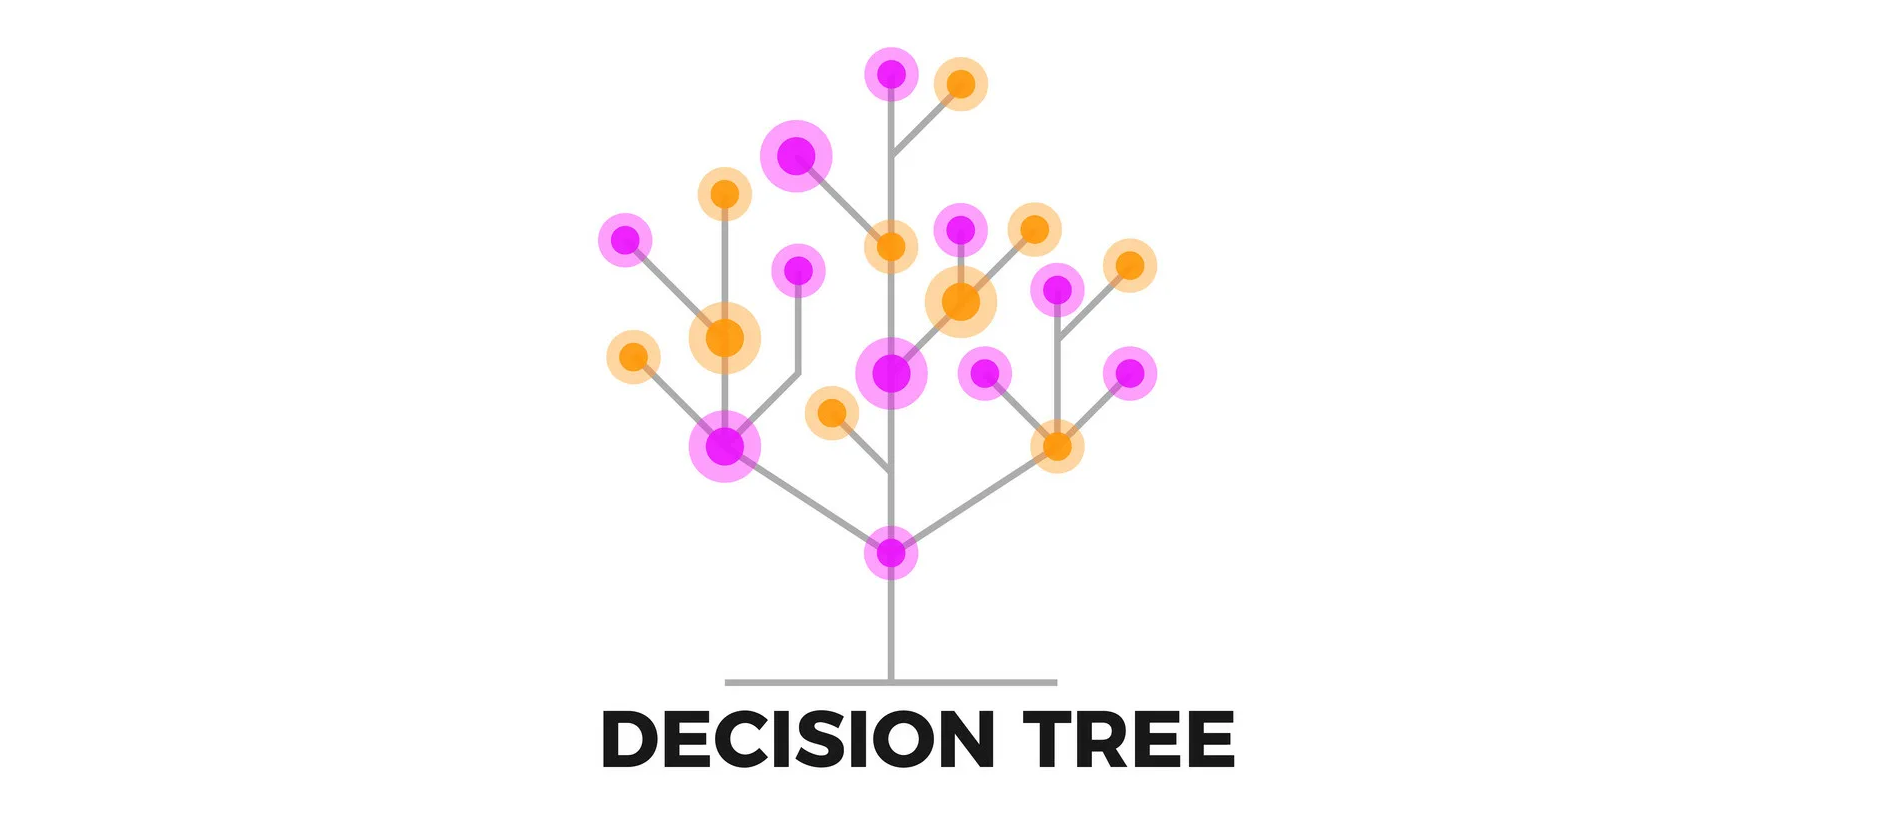

**Decision Tree** is the supervised Machine Learning algorithm which can be used both in classification and regression problems. Decision Trees provide a systematic way to make decisions by recursively partitioning the input space based on the feature values, eventually assigning a class label to each region.  

A decision tree is a hierarchical, graph-like, structure consisting of nodes and branches. Each internal node represents a decision based on a specific feature, and each leaf node represents a class label. The path from the root node to a leaf node defines the decision-making process. During training, the decision tree algorithm learns to create the most informative splits to effectively classify the data.

### Key Concepts of Decision Trees:

- **Tree Structure:** A decision tree consists of <u>nodes</u> connected by <u>edges</u>. Each node represents a decision or a test on an attribute, and each edge represents an outcome of that decision.

- **Root Node:** The topmost node in the tree is called the root node. It represents the initial decision or test that is made based on a selected attribute.

- **Internal Nodes**: Nodes in the middle of the tree, excluding the leaf nodes, are called internal nodes. They represent intermediate decisions or tests.

- **Leaf Nodes:** The bottom nodes of the tree are known as leaf nodes or <u>terminal nodes</u>. These nodes provide the final classification label or regression value.

- **Splitting Criteria:** At each internal node, the dataset is split into subsets based on a selected attribute and a specific threshold value. The goal is to find the best attribute and threshold that optimally separates the data into distinct classes.

### Advantages of Decision Trees:

- **Interpretability:** Decision trees provide transparent and intuitive explanations for decisions, making them easy to understand and interpret.

- **Handling Nonlinear Relationships:** Decision trees can capture complex nonlinear relationships in the data without requiring complex preprocessing.

- **Feature Importance:** Decision trees can quantify the importance of different attributes in the classification process.

### Building a Decision Tree:

1. **Selecting the Splitting Criterion:**
   - The Decision Tree algorithm uses a <u>splitting criterion</u> to determine how to divide the data at each node. Common splitting criteria include Gini impurity and entropy.
   - <span style="font-size: 11pt; color: orchid; font-weight: bold">Gini impurity</span> measures the probability of a randomly chosen data point being misclassified. It is mathematically defined as: $$Gini(p) = 1 - \sum_{i=1}^{n} p_i^2$$ where $p_i$ is the probability of the data point belonging to class $i$.
   - <span style="font-size: 11pt; color: orchid; font-weight: bold">Entropy</span>, on the other hand, measures the level of impurity or disorder in a dataset. It is mathematically defined as: $$Entropy(p) = -\sum_{i=1}^{n} p_i \log_2(p_i)$$ where $p_i$ is the probability of the data point belonging to class $i$.

2. **Building the Tree:**
   - The tree-building process is recursive. Starting at the root node, the algorithm selects the best feature and split point that minimizes the chosen impurity measure.
   - This process is repeated for each resulting child node until a stopping condition is met, such as reaching a predefined maximum depth or having a minimum number of samples in a node.

3. **Choosing the Best Split:**
   - For each node, the <u>algorithm evaluates different features and split points to find the one that maximally reduces impurity</u>. This is done by calculating impurity before and after the split and measuring the impurity decrease (e.g., using the Gini or Information Gain).
   - Information gain is calculated using the entropy before and after the split.

4. **Pruning the Tree (Optional):**
   - After the tree is built, it might be overly complex and prone to overfitting. Pruning involves removing branches that do not contribute significantly to the model's performance. This is usually done using techniques like Cost-Complexity Pruning.

5. **Making Predictions:**
   - Once the decision tree is constructed, we can use it to make predictions for new data points. Starting from the root, traverse down the tree by following the conditions at each node until you reach a leaf node. The class label associated with that leaf node becomes the prediction.

## Addition details on Decision Trees:
- Decision Tree is a Greedy algorithm (saves time and resources while providing good results)
- It's ok to mix data types in Decision Trees.
- Numerical values can appear multiple times with different thresholds.
- Gini Impurity used for binary Decision Trees (2 splits at each node)
- With Entropy as the criterion, Decision Trees with more than 2 splits at each node can be built.
- To choose the root node - we calculate and compare gini impurity for all features / target and pick the one with the least impurity.

## Making decision based on numerical features:
- First – sort the values in the numerical column
- Calculate averages between all adjacent elements
- Compute Gini impurity or Information Gain like if the splits were made based on each average value calculated at previous step.
- Choose the one which results in least Impurity or highest Information Gain

# Worked Example: Decision Tree for Classification 

In this example we will manually build the Decision Tree for Classification for predicting if the person is going to be overweight or not. Note, that the data we will be working with is imaginary and is only supposed be used for demonstration!

In [1]:
# Import pandas to construct DataFrame
# and work with data
import pandas as pd

# Data
data_dict = {'sex': ['male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'female'],
             'does_sports': ['no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no'],
             'age': [17, 36, 21, 35, 31, 30, 33, 24, 33, 19],
             'overweight': ['no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes']
}

df = pd.DataFrame(data_dict)
display(df)

,sex,does_sports,age,overweight
0,male,no,17,no
1,female,no,36,yes
2,male,yes,21,no
3,male,no,35,yes
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
7,male,yes,24,no
8,female,no,33,no
9,female,no,19,yes


## Choosing Criterion for splitting
In this example, we will use Gini Impurity as the splitting criterion.

## Choosing the Root node feature
First, we need to decide which feature will be at the root node.
For that we will have to go through laborous procedure of calculating Gini Impurity for each feature, present in our Dataset (except target variable - `overweight`)

### "sex" feature

In [2]:
df.groupby(['sex', 'overweight']).overweight.count()

sex     overweight
female  no            2
        yes           2
male    no            4
        yes           2
Name: overweight, dtype: int64

To compute Gini Impurity : $I_{\text{Gini}} = 1 - \sum_{i=1}^{k} p_i^2$:
1. First we build a tree with each feature ...
2. Compute the Gini impurity for each leaf
3. Compute the weighted average Gini impurity between two leaves.

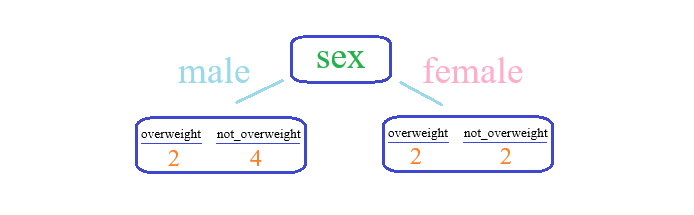

Probability $p_i$ from the formula corresponds to the probability of a person being male AND being overweight or not.

To compute weighted average Gini impurity between leaves we compute the corresponding weights for each leaf and then multiply them by the corresponding Gini Impurity values and sum the results.
- Weights are calculated as the proportion of number of elements in a leaf to the total number of elements in the both leaves.

In [3]:
gini_male = 1 - (2 / (2 + 4))**2 - (4 / (2 + 4))**2
gini_female = 1 - (2 / (2 + 2))**2 - (2 / (2 + 2))**2
weighted_avg_gini_sex = (6/10) * gini_male + (4/10) * gini_female
print(f' Gini Impurity for the "male" in "sex" feature: {round(gini_male, 3)}')
print(f' Gini Impurity for the "female" in "sex" feature: {round(gini_female, 3)}')
print(f' Weighted average Gini Impurity for the "sex" feature: {round(weighted_avg_gini_sex, 3)}')

 Gini Impurity for the "male" in "sex" feature: 0.444
 Gini Impurity for the "female" in "sex" feature: 0.5
 Weighted average Gini Impurity for the "sex" feature: 0.467


### "does_sports" feature

In [4]:
df.groupby(['does_sports', 'overweight']).overweight.count()

does_sports  overweight
no           no            2
             yes           4
yes          no            4
Name: overweight, dtype: int64

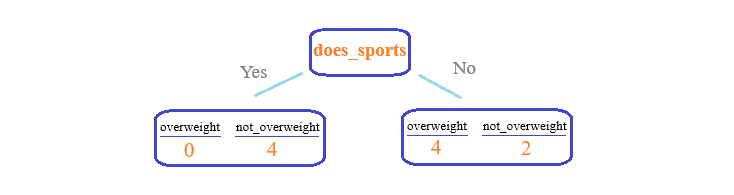

In [5]:
gini_sport = 1 - (0 / (0 + 4))**2 - (4 / (0 + 4))**2
gini_no_sport = 1 - (4 / (4 + 2))**2 - (2 / (4 + 2))**2
weighted_avg_gini_sport = (4 / 10) * gini_male + (6 / 10) * gini_female

print(f' Gini Impurity for the "yes" in "does_sports" feature: {round(gini_sport, 3)}')
print(f' Gini Impurity for the "no" in "does_sports" feature: {round(gini_no_sport, 3)}')
print(f' Weighted average Gini Impurity for the "does_sports" feature: {round(weighted_avg_gini_sport, 3)}')

 Gini Impurity for the "yes" in "does_sports" feature: 0.0
 Gini Impurity for the "no" in "does_sports" feature: 0.444
 Weighted average Gini Impurity for the "does_sports" feature: 0.478


### "age" feature

To evaluate the splits using continuous variable, we have to sort the values in the column and then compute the average between every two adjacent observations, compute Gini Impurity for each average value and then pick the one with the least Impurity value to compare it with splits based on other features.

First lets sort the values and compute the averages.

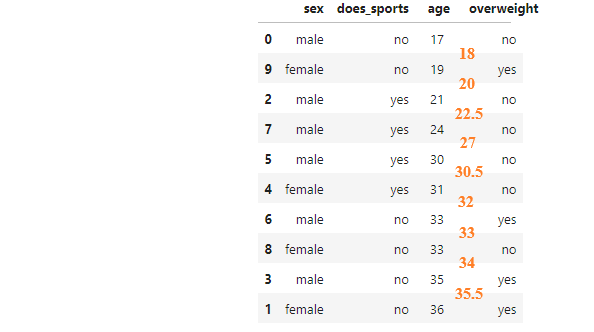

Next – we build splits for each avg. value.:
- If age is less than avg. value - it goes to the left "yes" split, 
- if above - to the right "no" split

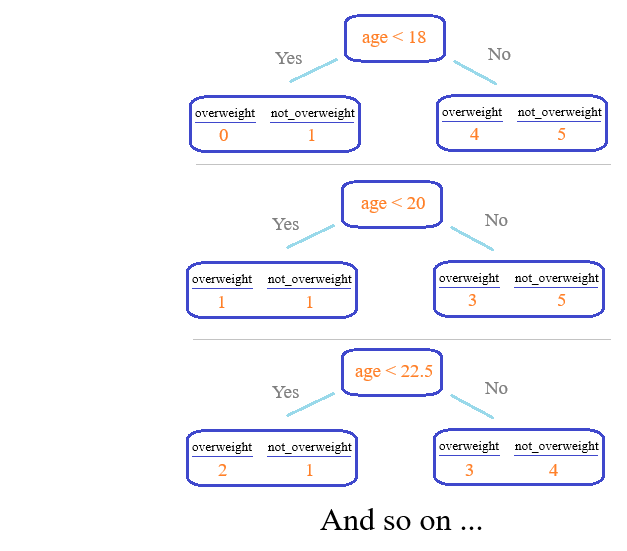

##### age<18

In [6]:
display(df.query('age < 18'))
display(df.query('age >= 18'))

,sex,does_sports,age,overweight
0,male,no,17,no


,sex,does_sports,age,overweight
1,female,no,36,yes
2,male,yes,21,no
3,male,no,35,yes
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
7,male,yes,24,no
8,female,no,33,no
9,female,no,19,yes


In [7]:
gini_age_less_18 = 1 - (0 / (0 + 1))**2 - (1 / (0 + 1))**2
gini_age_geq_18 = 1 - (4 / (4 + 5))**2 - (5 / (4 + 5))**2
weighted_avg_gini_age18 = (1/10) * gini_age_less_18 + (9/10) * gini_age_geq_18

print(f' Gini Impurity for the "yes" in "age<18" split of "age" feature: {round(gini_age_less_18, 3)}')
print(f' Gini Impurity for the "no" in "age<18" split of "age" feature: {round(gini_age_geq_18, 3)}')
print(f' Weighted average Gini Impurity for the "age<18" split of "age" feature: {round(weighted_avg_gini_age18, 3)}')

 Gini Impurity for the "yes" in "age<18" split of "age" feature: 0.0
 Gini Impurity for the "no" in "age<18" split of "age" feature: 0.494
 Weighted average Gini Impurity for the "age<18" split of "age" feature: 0.444


##### age<20

In [8]:
display(df.query('age < 20'))
display(df.query('age >= 20'))

,sex,does_sports,age,overweight
0,male,no,17,no
9,female,no,19,yes


,sex,does_sports,age,overweight
1,female,no,36,yes
2,male,yes,21,no
3,male,no,35,yes
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
7,male,yes,24,no
8,female,no,33,no


In [9]:
gini_age_less_20 = 1 - (1 / (1 + 1))**2 - (1 / (1 + 1))**2
gini_age_geq_20 = 1 - (3 / (3 + 5))**2 - (5 / (3 + 5))**2
weighted_avg_gini_age20 = (2/10) * gini_age_less_20 + (8/10) * gini_age_geq_20

print(f' Gini Impurity for the "yes" in "age<20" split of "age" feature: {round(gini_age_less_20, 3)}')
print(f' Gini Impurity for the "no" in "age<20" split of "age" feature: {round(gini_age_geq_20, 3)}')
print(f' Weighted average Gini Impurity for the "age<20" split of "age" feature: {round(weighted_avg_gini_age20, 3)}')

 Gini Impurity for the "yes" in "age<20" split of "age" feature: 0.5
 Gini Impurity for the "no" in "age<20" split of "age" feature: 0.469
 Weighted average Gini Impurity for the "age<20" split of "age" feature: 0.475


##### age<22.5

In [10]:
display(df.query('age < 22.5'))
display(df.query('age >= 22.5'))

,sex,does_sports,age,overweight
0,male,no,17,no
2,male,yes,21,no
9,female,no,19,yes


,sex,does_sports,age,overweight
1,female,no,36,yes
3,male,no,35,yes
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
7,male,yes,24,no
8,female,no,33,no


In [11]:
gini_age_less_225 = 1 - (1 / (1 + 2))**2 - (2 / (1 + 2))**2
gini_age_geq_225 = 1 - (3 / (3 + 4))**2 - (4 / (3 + 4))**2
weighted_avg_gini_age225 = (3/10) * gini_age_less_225 + (7/10) * gini_age_geq_225

print(f' Gini Impurity for the "yes" in "age<22.5" split of "age" feature: {round(gini_age_less_225, 3)}')
print(f' Gini Impurity for the "no" in "age<22.5" split of "age" feature: {round(gini_age_geq_225, 3)}')
print(f' Weighted average Gini Impurity for the "age<22.5" split of "age" feature: {round(weighted_avg_gini_age225, 3)}')

 Gini Impurity for the "yes" in "age<22.5" split of "age" feature: 0.444
 Gini Impurity for the "no" in "age<22.5" split of "age" feature: 0.49
 Weighted average Gini Impurity for the "age<22.5" split of "age" feature: 0.476


##### age<27

In [12]:
display(df.query('age < 27'))
display(df.query('age >= 27'))

,sex,does_sports,age,overweight
0,male,no,17,no
2,male,yes,21,no
7,male,yes,24,no
9,female,no,19,yes


,sex,does_sports,age,overweight
1,female,no,36,yes
3,male,no,35,yes
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
8,female,no,33,no


In [13]:
gini_age_less_27 = 1 - (1 / (1 + 3))**2 - (3 / (1 + 3))**2
gini_age_geq_27 = 1 - (3 / (3 + 3))**2 - (3 / (3 + 3))**2
weighted_avg_gini_age27 = (4/10) * gini_age_less_27 + (6/10) * gini_age_geq_27

print(f' Gini Impurity for the "yes" in "age<27" split of "age" feature: {round(gini_age_less_27, 3)}')
print(f' Gini Impurity for the "no" in "age<27" split of "age" feature: {round(gini_age_geq_27, 3)}')
print(f' Weighted average Gini Impurity for the "age<27" split of "age" feature: {round(weighted_avg_gini_age27, 3)}')

 Gini Impurity for the "yes" in "age<27" split of "age" feature: 0.375
 Gini Impurity for the "no" in "age<27" split of "age" feature: 0.5
 Weighted average Gini Impurity for the "age<27" split of "age" feature: 0.45


##### age<30.5

In [14]:
display(df.query('age < 30.5'))
display(df.query('age >= 30.5'))

,sex,does_sports,age,overweight
0,male,no,17,no
2,male,yes,21,no
5,male,yes,30,no
7,male,yes,24,no
9,female,no,19,yes


,sex,does_sports,age,overweight
1,female,no,36,yes
3,male,no,35,yes
4,female,yes,31,no
6,male,no,33,yes
8,female,no,33,no


In [15]:
gini_age_less_305 = 1 - (1 / (1 + 4))**2 - (4 / (1 + 4))**2
gini_age_geq_305 = 1 - (3 / (3 + 2))**2 - (2 / (3 + 2))**2
weighted_avg_gini_age305 = (5/10) * gini_age_less_305 + (5/10) * gini_age_geq_305

print(f' Gini Impurity for the "yes" in "age<30.5" split of "age" feature: {round(gini_age_less_305, 3)}')
print(f' Gini Impurity for the "no" in "age<30.5" split of "age" feature: {round(gini_age_geq_305, 3)}')
print(f' Weighted average Gini Impurity for the "age<30.5" split of "age" feature: {round(weighted_avg_gini_age305, 3)}')

 Gini Impurity for the "yes" in "age<30.5" split of "age" feature: 0.32
 Gini Impurity for the "no" in "age<30.5" split of "age" feature: 0.48
 Weighted average Gini Impurity for the "age<30.5" split of "age" feature: 0.4


##### age<32

In [16]:
display(df.query('age < 32'))
display(df.query('age >= 32'))

,sex,does_sports,age,overweight
0,male,no,17,no
2,male,yes,21,no
4,female,yes,31,no
5,male,yes,30,no
7,male,yes,24,no
9,female,no,19,yes


,sex,does_sports,age,overweight
1,female,no,36,yes
3,male,no,35,yes
6,male,no,33,yes
8,female,no,33,no


In [17]:
gini_age_less_32 = 1 - (1 / (1 + 5))**2 - (5 / (1 + 5))**2
gini_age_geq_32 = 1 - (3 / (3 + 1))**2 - (1 / (3 + 1))**2
weighted_avg_gini_age32 = (6/10) * gini_age_less_32 + (4/10) * gini_age_geq_32

print(f' Gini Impurity for the "yes" in "age<32" split of "age" feature: {round(gini_age_less_32, 3)}')
print(f' Gini Impurity for the "no" in "age<32" split of "age" feature: {round(gini_age_geq_32, 3)}')
print(f' Weighted average Gini Impurity for the "age<32" split of "age" feature: {round(weighted_avg_gini_age32, 3)}')

 Gini Impurity for the "yes" in "age<32" split of "age" feature: 0.278
 Gini Impurity for the "no" in "age<32" split of "age" feature: 0.375
 Weighted average Gini Impurity for the "age<32" split of "age" feature: 0.317


We could have very well stopped here as we have found Weighted Average Gini Impurity of $0$, but we will finish the calculations for the sake of practice.

##### age<33

In [18]:
display(df.query('age < 33'))
display(df.query('age >= 33'))

,sex,does_sports,age,overweight
0,male,no,17,no
2,male,yes,21,no
4,female,yes,31,no
5,male,yes,30,no
7,male,yes,24,no
9,female,no,19,yes


,sex,does_sports,age,overweight
1,female,no,36,yes
3,male,no,35,yes
6,male,no,33,yes
8,female,no,33,no


In [19]:
gini_age_less_33 = 1 - (1 / (1 + 5))**2 - (5 / (1 + 5))**2
gini_age_geq_33 = 1 - (3 / (3 + 1))**2 - (1 / (3 + 1))**2
weighted_avg_gini_age33 = (6/10) * gini_age_less_33 + (4/10) * gini_age_geq_33

print(f' Gini Impurity for the "yes" in "age<33" split of "age" feature: {round(gini_age_less_33, 3)}')
print(f' Gini Impurity for the "no" in "age<33" split of "age" feature: {round(gini_age_geq_33, 3)}')
print(f' Weighted average Gini Impurity for the "age<33" split of "age" feature: {round(weighted_avg_gini_age33, 3)}')

 Gini Impurity for the "yes" in "age<33" split of "age" feature: 0.278
 Gini Impurity for the "no" in "age<33" split of "age" feature: 0.375
 Weighted average Gini Impurity for the "age<33" split of "age" feature: 0.317


##### age<34

In [20]:
display(df.query('age < 34'))
display(df.query('age >= 34'))

,sex,does_sports,age,overweight
0,male,no,17,no
2,male,yes,21,no
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
7,male,yes,24,no
8,female,no,33,no
9,female,no,19,yes


,sex,does_sports,age,overweight
1,female,no,36,yes
3,male,no,35,yes


In [21]:
gini_age_less_34 = 1 - (2 / (2 + 6))**2 - (6 / (2 + 6))**2
gini_age_geq_34 = 1 - (2 / (2 + 0))**2 - (0 / (2 + 0))**2
weighted_avg_gini_age34 = (8/10) * gini_age_less_34 + (2/10) * gini_age_geq_34

print(f' Gini Impurity for the "yes" in "age<34" split of "age" feature: {round(gini_age_less_34, 3)}')
print(f' Gini Impurity for the "no" in "age<34" split of "age" feature: {round(gini_age_geq_34, 3)}')
print(f' Weighted average Gini Impurity for the "age<34" split of "age" feature: {round(weighted_avg_gini_age34, 3)}')

 Gini Impurity for the "yes" in "age<34" split of "age" feature: 0.375
 Gini Impurity for the "no" in "age<34" split of "age" feature: 0.0
 Weighted average Gini Impurity for the "age<34" split of "age" feature: 0.3


##### age<35.5

In [22]:
display(df.query('age < 35.5'))
display(df.query('age >= 35.5'))

,sex,does_sports,age,overweight
0,male,no,17,no
2,male,yes,21,no
3,male,no,35,yes
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
7,male,yes,24,no
8,female,no,33,no
9,female,no,19,yes


,sex,does_sports,age,overweight
1,female,no,36,yes


In [23]:
gini_age_less_355 = 1 - (3 / (3 + 6))**2 - (6 / (3 + 6))**2
gini_age_geq_355 = 1 - (1 / (1 + 0))**2 - (0 / (1 + 0))**2
weighted_avg_gini_age355 = (9/10) * gini_age_less_355 + (1/10) * gini_age_geq_355

print(f' Gini Impurity for the "yes" in "age<35.5" split of "age" feature: {round(gini_age_less_355, 3)}')
print(f' Gini Impurity for the "no" in "age<35.5" split of "age" feature: {round(gini_age_geq_355, 3)}')
print(f' Weighted average Gini Impurity for the "age<35.5" split of "age" feature: {round(weighted_avg_gini_age355, 3)}')

 Gini Impurity for the "yes" in "age<35.5" split of "age" feature: 0.444
 Gini Impurity for the "no" in "age<35.5" split of "age" feature: 0.0
 Weighted average Gini Impurity for the "age<35.5" split of "age" feature: 0.4


After we have finished all of the computations - we should select the split with the lowest impurity, to compare it with other features.   
Our table now looks like this:

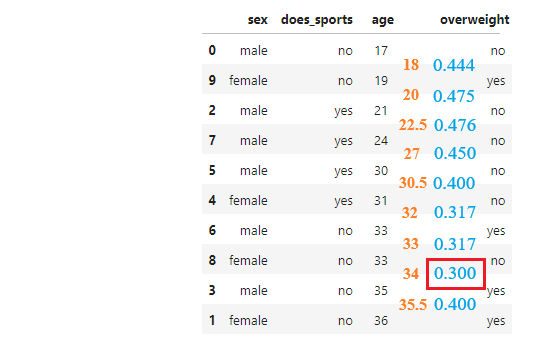

"age<34" split provides the best result with Gini Impurity = $0.300$, let's compare it with other features

After calculations, we have the following splitting options to choose from:
- "**sex**" with the value of Gini Impurity = **0.467**
- "**does_sports**" with the value of Gini Impurity = **0.478**
- "**age<34**" with the value of Gini Impurity = **0.300**

Let's decide to make "age<34" the root node of our tree. All people whos age is less than 34 will go to the left, others - to the right.
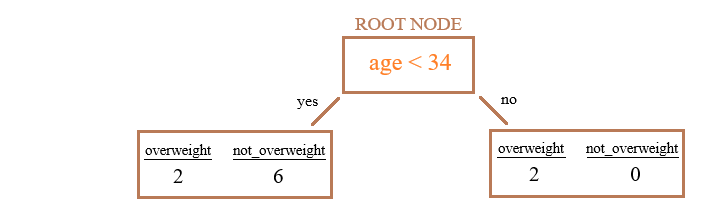

As we can now see, right leaf is already Pure, so we don't need to split it further. The right leaf is impure and we need to decide on which criteria to perform the next split.

In [24]:
df.query('age < 34')

,sex,does_sports,age,overweight
0,male,no,17,no
2,male,yes,21,no
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
7,male,yes,24,no
8,female,no,33,no
9,female,no,19,yes


## Split #1
To decide on what feature to perform a split, we will again compute Impurities for all available splitting options and choose the one which results in the lowest impurity

### 'sex'

In [25]:
df.query('age < 34').groupby(['sex','overweight']).overweight.count()

sex     overweight
female  no            2
        yes           1
male    no            4
        yes           1
Name: overweight, dtype: int64

In [26]:
gini_sex_male = 1 - (1 / (1 + 4))**2 - (4 / (1 + 4))**2
gini_sex_female = 1 - (1 / (1 + 2))**2 - (2 / (1 + 2))**2
weighted_avg_gini_sex = (5 / 8) * gini_sex_male + (3 / 8) * gini_sex_female

print(f' Gini Impurity for the "sex = male" feature: {round(gini_sex_male, 3)}')
print(f' Gini Impurity for the "sex = female" feature: {round(gini_sex_female, 3)}')
print(f' Weighted average Gini Impurity for the "sex" feature: {round(weighted_avg_gini_sex, 3)}')

 Gini Impurity for the "sex = male" feature: 0.32
 Gini Impurity for the "sex = female" feature: 0.444
 Weighted average Gini Impurity for the "sex" feature: 0.367


### "does_sports"

In [27]:
df.query('age < 34').groupby(['does_sports','overweight']).overweight.count()

does_sports  overweight
no           no            2
             yes           2
yes          no            4
Name: overweight, dtype: int64

In [28]:
gini_sports_yes = 1 - (0 / (0 + 4))**2 - (4 / (0 + 4))**2
gini_sports_no = 1 - (2 / (2 + 2))**2 - (2 / (2 + 2))**2
weighted_avg_gini_sports = (4 / 8) * gini_sex_male + (4 / 8) * gini_sex_female

print(f' Gini Impurity for the "does_sports = yes" feature: {round(gini_sports_yes, 3)}')
print(f' Gini Impurity for the "does_sports = no" feature: {round(gini_sports_no, 3)}')
print(f' Weighted average Gini Impurity for the "does_sports" feature: {round(weighted_avg_gini_sports, 3)}')

 Gini Impurity for the "does_sports = yes" feature: 0.0
 Gini Impurity for the "does_sports = no" feature: 0.5
 Weighted average Gini Impurity for the "does_sports" feature: 0.382


### "age"

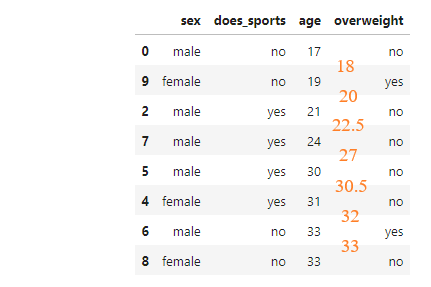

In [29]:
# age < 18
yes = 1 - (0 / (0 + 1))**2 - (1 / (0 + 1))**2
no = 1 - (2 / (2 + 5))**2 - (5 / (2 + 5))**2
weighted_avg_gini = (1 / 8) * yes + (7 / 8) * no
print(f'Weighted average gini for split on "age < 18": {weighted_avg_gini}')

Weighted average gini for split on "age < 18": 0.35714285714285715


In [30]:
# age < 20
yes = 1 - (1 / (1 + 1))**2 - (1 / (1 + 1))**2
no = 1 - (1 / (1 + 5))**2 - (5 / (1 + 5))**2
weighted_avg_gini = (2 / 8) * yes + (6 / 8) * no
print(f'Weighted average gini for split on "age < 20": {weighted_avg_gini}')

Weighted average gini for split on "age < 20": 0.33333333333333326


In [31]:
# age < 22.5
yes = 1 - (1 / (1 + 2))**2 - (2 / (1 + 2))**2
no = 1 - (1 / (1 + 4))**2 - (4 / (1 + 4))**2
weighted_avg_gini = (3 / 8) * yes + (5 / 8) * no
print(f'Weighted average gini for split on "age < 22.5": {weighted_avg_gini}')

Weighted average gini for split on "age < 22.5": 0.3666666666666666


In [32]:
# age < 27
yes = 1 - (1 / (1 + 3))**2 - (3 / (1 + 3))**2
no = 1 - (1 / (1 + 3))**2 - (3 / (1 + 3))**2
weighted_avg_gini = (4 / 8) * yes + (4 / 8) * no
print(f'Weighted average gini for split on age < 27": {weighted_avg_gini}')

Weighted average gini for split on age < 27": 0.375


In [33]:
# age < 30.5
yes = 1 - (1 / (1 + 4))**2 - (4 / (1 + 4))**2
no = 1 - (1 / (1 + 2))**2 - (2 / (1 + 2))**2
weighted_avg_gini = (5 / 8) * yes + (3 / 8) * no
print(f'Weighted average gini for split on "age < 30.5": {weighted_avg_gini}')

Weighted average gini for split on "age < 30.5": 0.3666666666666666


In [34]:
# age < 32
yes = 1 - (1 / (1 + 5))**2 - (5 / (1 + 5))**2
no = 1 - (1 / (1 + 1))**2 - (1 / (1 + 1))**2
weighted_avg_gini = (6 / 8) * yes + (2 / 8) * no
print(f'Weighted average gini for split on "age < 32": {weighted_avg_gini}')

Weighted average gini for split on "age < 32": 0.33333333333333326


In [35]:
# age < 33
yes = 1 - (2 / (2 + 5))**2 - (5 / (2 + 5))**2
no = 1 - (0 / (0 + 1))**2 - (1 / (0 + 1))**2
weighted_avg_gini = (7 / 8) * yes + (1 / 8) * no
print(f'Weighted average gini for split on "age < 33": {weighted_avg_gini}')

Weighted average gini for split on "age < 33": 0.35714285714285715


Splitting on **age < 20** and **age < 32** results in the least impurity among all features:
- "age<20" = 0.333
- "sex" = 0.367
- "does_sports" = 0.382

So we perform split on the numerical column again.
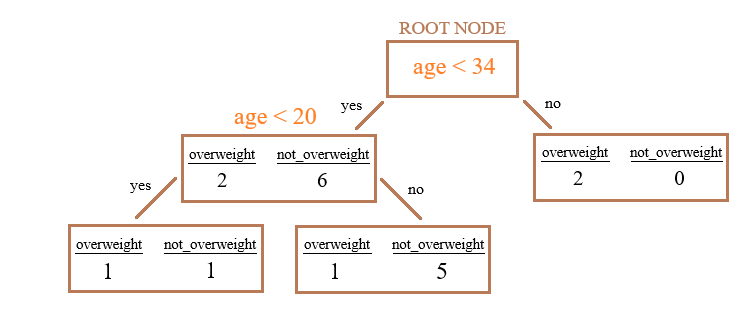

Now we again have to decide on the splits, since nodes are still impure.

## Split #2 left child

In [36]:
df.query('age < 20')

,sex,does_sports,age,overweight
0,male,no,17,no
9,female,no,19,yes


### "sex"

In [37]:
male = 1 - (0 / (0 + 1))**2 - (1 / (0 + 1))**2
female = 1 - (1 / (1 + 0))**2 - (0 / (1 + 0))**2
weighted_avg_gini = (1 / 2) * male + (1 / 2) * female
print(f'Weighted average gini for split on "sex": {weighted_avg_gini}')

Weighted average gini for split on "sex": 0.0


### "does_sports"

In [38]:
eps = 1e-10
yes = 1 - (0 / (0 + 0 + eps))**2 - (0 / (0 + 0 + eps))**2
no = 1 - (1 / (1 + 1))**2 - (1 / (1 + 1))**2
weighted_avg_gini = (0 / 2) * yes + (2 / 2) * no
print(f'Weighted average gini for split on "does_sports": {weighted_avg_gini}')

Weighted average gini for split on "does_sports": 0.5


### "age < 18"

In [39]:
# 17 + 19 = 36 
# 36 / 2 = 18
yes = 1 - (0 / (0 + 1))**2 - (1 / (0 + 1))**2
no = 1 - (1 / (1 + 0))**2 - (0 / (1 + 0))**2
weighted_avg_gini = (1 / 2) * yes + (1 / 2) * no
print(f'Weighted average gini for split on "age < 18": {weighted_avg_gini}')

Weighted average gini for split on "age < 18": 0.0


features "sex" and "age" provide best splits with Gini Impurity = 0, we can choose any of them.  
Let's choose "sex" to perform the next split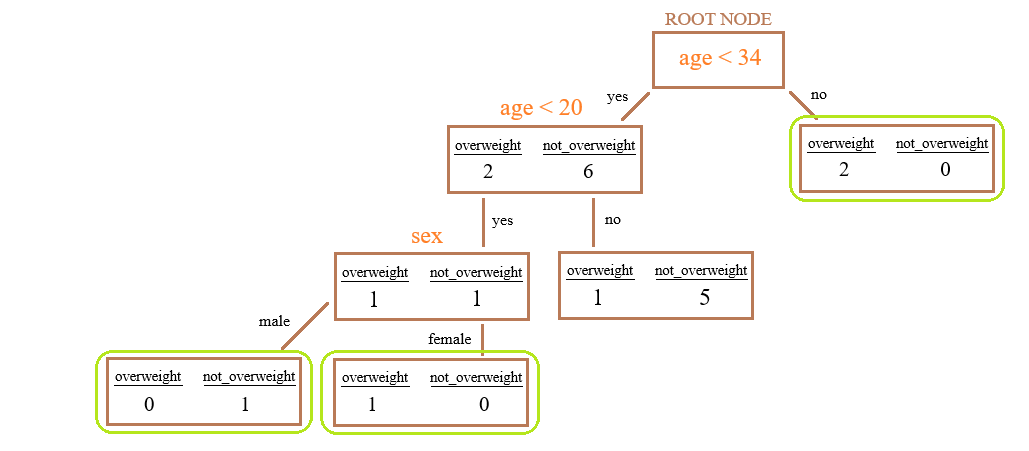

## Split #2 right child

In [40]:
df.query('age >= 20 and age < 34').sort_values(by='age')

,sex,does_sports,age,overweight
2,male,yes,21,no
7,male,yes,24,no
5,male,yes,30,no
4,female,yes,31,no
6,male,no,33,yes
8,female,no,33,no


### "sex"

In [41]:
male = 1 - (1 / (1 + 3))**2 - (3 / (1 + 3))**2
female = 1 - (0 / (0 + 2))**2 - (2 / (0 + 2))**2
weighted_avg_gini = (4 / 6) * male + (2 / 6) * female
print(f'Weighted average gini for split on "sex": {weighted_avg_gini}')

Weighted average gini for split on "sex": 0.25


### "does_sports"

In [42]:
eps = 1e-10
yes = 1 - (0 / (0 + 4 + eps))**2 - (4 / (0 + 4 + eps))**2
no = 1 - (1 / (1 + 1))**2 - (1 / (1 + 1))**2
weighted_avg_gini = (4 / 6) * yes + (2 / 6) * no
print(f'Weighted average gini for split on "does_sports": {weighted_avg_gini}')

Weighted average gini for split on "does_sports": 0.1666666667


### "age"

In [43]:
# (21 + 24) / 2 = 22.5
less = 1 - (0 / (0 + 1))**2 - (1 / (0 + 1))**2
more = 1 - (1 / (1 + 4))**2 - (4 / (1 + 4))**2
weighted_avg_gini = (1 / 6) * less + (5 / 6) * more
print(f'Weighted average gini for split on "age < 22.5": {weighted_avg_gini}')

Weighted average gini for split on "age < 22.5": 0.26666666666666655


In [44]:
# (24 + 30) / 2 = 27
less = 1 - (0 / (0 + 2))**2 - (2 / (0 + 2))**2
more = 1 - (1 / (1 + 3))**2 - (3 / (1 + 3))**2
weighted_avg_gini = (2 / 6) * less + (4 / 6) * more
print(f'Weighted average gini for split on "age < 27": {weighted_avg_gini}')

Weighted average gini for split on "age < 27": 0.25


In [45]:
# (30 + 31) / 2 = 30.5
less = 1 - (0 / (0 + 3))**2 - (3 / (0 + 3))**2
more = 1 - (1 / (1 + 2))**2 - (2 / (1 + 2))**2
weighted_avg_gini = (3 / 6) * less + (3 / 6) * more
print(f'Weighted average gini for split on "age < 30.5": {weighted_avg_gini}')

Weighted average gini for split on "age < 30.5": 0.2222222222222222


In [46]:
# (31 + 33) / 2 = 32
less = 1 - (0 / (0 + 4))**2 - (4 / (0 + 4))**2
more = 1 - (1 / (1 + 1))**2 - (1 / (1 + 1))**2
weighted_avg_gini = (4 / 6) * less + (2 / 6) * more
print(f'Weighted average gini for split on "age < 32": {weighted_avg_gini}')

Weighted average gini for split on "age < 32": 0.16666666666666666


In [47]:
# (33 + 33) / 2 = 33
less = 1 - (1 / (1 + 4))**2 - (4 / (1 + 4))**2
more = 1 - (0 / (0 + 1))**2 - (1 / (0 + 1))**2
weighted_avg_gini = (5 / 6) * less + (1 / 6) * more
print(f'Weighted average gini for split on "age < 33": {weighted_avg_gini}')

Weighted average gini for split on "age < 33": 0.26666666666666655


Let's pick "does_sports" for the split this time  

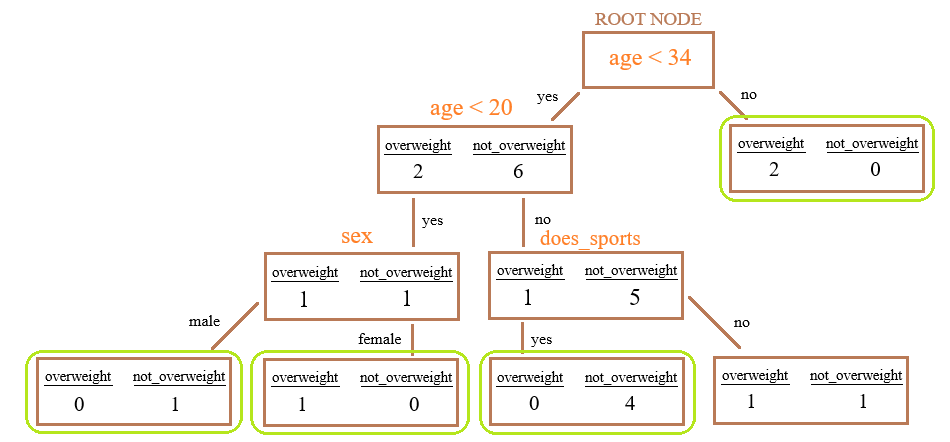

We have one last node left to process.

## Split #3

In [48]:
df.query('20 <= age < 34 and does_sports == "no"') 

,sex,does_sports,age,overweight
6,male,no,33,yes
8,female,no,33,no


### "sex"

In [49]:
male = 1 - (1 / (1 + 0))**2 - (0 / (1 + 0))**2
female = 1 - (0 / (0 + 1))**2 - (1 / (0 + 1))**2
weighted_avg_gini = (1 / 2) * male + (1 / 2) * female
print(f'Weighted average gini for split on "sex": {weighted_avg_gini}')

Weighted average gini for split on "sex": 0.0


### "does_sports"

In [50]:
eps = 1e-10
yes = 1 - (0 / (0 + 0 + eps))**2 - (0 / (0 + 0 + eps))**2
no = 1 - (1 / (1 + 1))**2 - (1 / (1 + 1))**2
weighted_avg_gini = (0 / 2) * yes + (1 / 2) * no
print(f'Weighted average gini for split on "does_sports": {weighted_avg_gini}')

Weighted average gini for split on "does_sports": 0.25


### "age"

In [51]:
# (33 + 33) / 2 = 33
eps = 1e-10
less = 1 - (0 / (0 + 0 + eps))**2 - (0 / (0 + 0 + eps))**2
more = 1 - (1 / (1 + 1))**2 - (1 / (1 + 1))**2
weighted_avg_gini = (0 / 2) * less + (1 / 2) * more
print(f'Weighted average gini for split on "age < 33": {weighted_avg_gini}')

Weighted average gini for split on "age < 33": 0.25


For the final split, we choose "sex" (Gini = 0) to perform the split on.
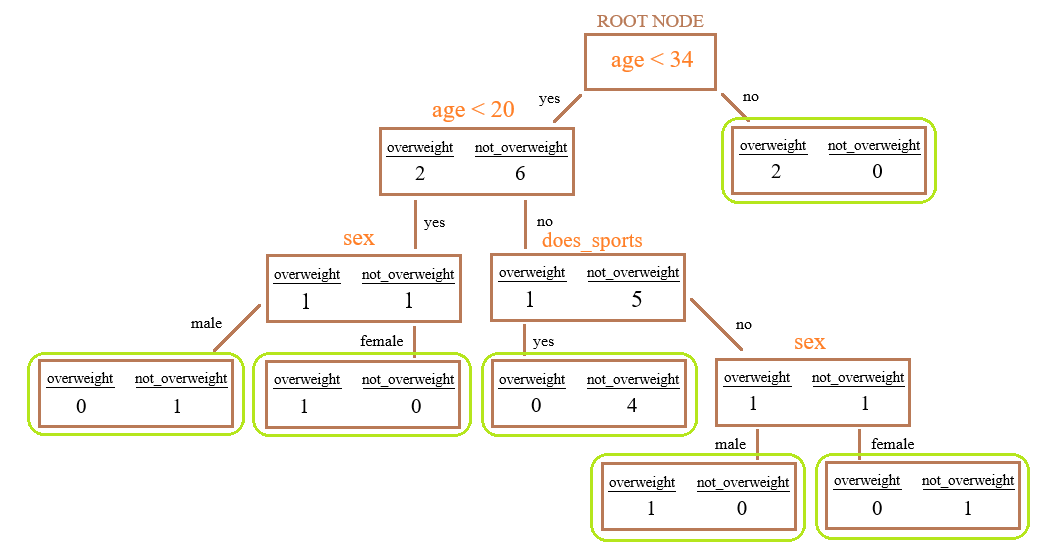

<span style="font-size: 22pt; color: seagreen; font-weight: bold">Hooray! We have finally built our DecisionTree for Classification!</span>

Our Decision Tree classifies all people whos age is above 34 as being overweight, which can not be further from truth. But still, based on the data provided, it was the best decision we could have made in this toy example.

**Note**: We should assign the output values to the leaf (terminal) nodes, based on the majority vote, which is one of the most common approaches.  
**Note**: Decision Trees have the ability to fit training data exceptionally well, and thus they are prone to overfitting. There are different techinques which can be employed, while building tree models, to reduce overfitting and improve generalization such as:
- **Pruning:** Pruning involves trimming the tree by removing branches that do not significantly contribute to improving the model's performance on validation or test data. Pruning can be done using techniques like Reduced Error Pruning or Cost-Complexity Pruning. It helps prevent the model from capturing noise in the training data and results in a simpler and more generalizable tree.
- **Limiting maximum depth of a Tree:**  You can limit the depth of the tree. This prevents the tree from becoming overly deep and complex, reducing the risk of overfitting.
- **Enforcing minimum samples for split:** We can set a minimum number of samples required to perform a split at a node. This prevents the algorithm from creating splits that are based on small subsets of data, which might lead to overfitting.
- **Enforcing minimum samples for leaf:** We may set a threshold for the minimum number of samples required in a leaf node, this helps reduce overfitting and fitting noise.
- **Cross - Validation:** Cross - Validation techniques such as K-fold cross-validation help to assess the model's performance on different subsets of the training data. This helps to identify if the model is overfitting by performing well on the training data but poorly on unseen data.
- **Early stopping (Boosting):** In boosting algorithms like AdaBoost, CatBoost or LightGBM and others, you can monitor the model's performance during training and stop when the validation error starts increasing. This prevents the model from fitting noise in the training data.